<a href="https://colab.research.google.com/github/LorenzoTarricone/TranscriptomiC/blob/Research_and_development/TrascriptomiC%2B%2Bipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TrascriptomiC++ 
##Input
###Format
The platform will accept files in the following format of the data:

- `.csv`
- `.txt` with the first entries being the header of the table and the indexes needs to be also included 
- `.mtx`

###Technilogies
The platform will accept files produced with the following technologies:

- SlideSeq: we will adopt the convention that the rows (indices) indicate the `gene` and the columns will indicate the `beam/barcode`. Each entry of the table will be therefore the level of expression of a certain gene registered on a certain beam

- Cartana: we will adopt the convention that the rows (indices) indicate the genes and there will be two columns containing the `X` and the `Y` coordinates for each `gene` 

---


##Data Exploration 

In [1]:
import scipy.io
import scipy.sparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import random
import matplotlib.pyplot as plt


In [2]:
Matrix = pd.DataFrame(scipy.io.mmread('/content/drive/MyDrive/Bocconi/Colab Notebooks/CSE201 Trascriptomic++/Data/matrix.mtx').todense())

In [3]:
Matrix

,0,1,2,3,4,5,6,7,8,9,...,14749,14750,14751,14752,14753,14754,14755,14756,14757,14758
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,3,3,0,8,0,2,4,2,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23454,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23455,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23456,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


First I map the correct names for features and cells

In [4]:
features = pd.read_table("/content/drive/MyDrive/Bocconi/Colab Notebooks/CSE201 Trascriptomic++/Data/features.tsv", header = None)
features

,0,1
0,ENSG00000121410,A1BG
1,ENSG00000268895,A1BG-AS1
2,ENSG00000175899,A2M
3,ENSG00000245105,A2M-AS1
4,ENSG00000166535,A2ML1
...,...,...
23453,ENSG00000203995,ZYG11A
23454,ENSG00000162378,ZYG11B
23455,ENSG00000159840,ZYX
23456,ENSG00000074755,ZZEF1


In [5]:
barcodes = pd.read_table("/content/drive/MyDrive/Bocconi/Colab Notebooks/CSE201 Trascriptomic++/Data/barcodes_new.tsv", sep = "\n", header = None)
barcodes

,0
0,CCAGCCCACAATTA-1
1,ATCTTGAGTTTGGC-1
2,CCATTTTAGAAGTA-1
3,GCTCGCGTCTGTNG-1
4,TCAGGNGTTTGGGG-1
...,...
14754,ATGAGGCAATTAGG-1
14755,AATCTTTGTTTTGA-1
14756,ACATGTTTTCGGGT-1
14757,ATCCCTTTTTNTAA-1


In [6]:
Matrix.set_axis(barcodes[0], axis=1, inplace = True)
Matrix.set_axis(features[1], axis=0, inplace = True)
del barcodes 
del features
Matrix

,CCAGCCCACAATTA-1,ATCTTGAGTTTGGC-1,CCATTTTAGAAGTA-1,GCTCGCGTCTGTNG-1,TCAGGNGTTTGGGG-1,AAATCCCGTGGGGG-1,AAACTAACCCCANA-1,NTGCTACACGGTAA-1,AGTCCAAGCTCTTG-1,GCTTCTAGTGACGG-1,...,TTATTCCACTCCTT-1,TTCTTTTTTCCCTT-1,AAAGTNTTGTTCGC-1,NCGCTTTTAAAATN-1,CCGCATAGCGGCGT-1,ATGAGGCAATTAGG-1,AATCTTTGTTTTGA-1,ACATGTTTTCGGGT-1,ATCCCTTTTTNTAA-1,AGAAAAACAATCCC-1
1,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,1,0,1,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,4,3,3,0,8,0,2,4,2,1,...,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZYG11B,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
ZYX,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Matrix.to_csv("true_matrix.csv")


Now we do some basic data plotting to see the distribution of the sparsity in the data

In [ ]:
print(f"The average sparsity of the table is: {(Matrix == 0).sum().sum() / (Matrix.shape[0] * Matrix.shape[1]) * 100}%")

The average sparsity of the table is: 99.18480661509082%


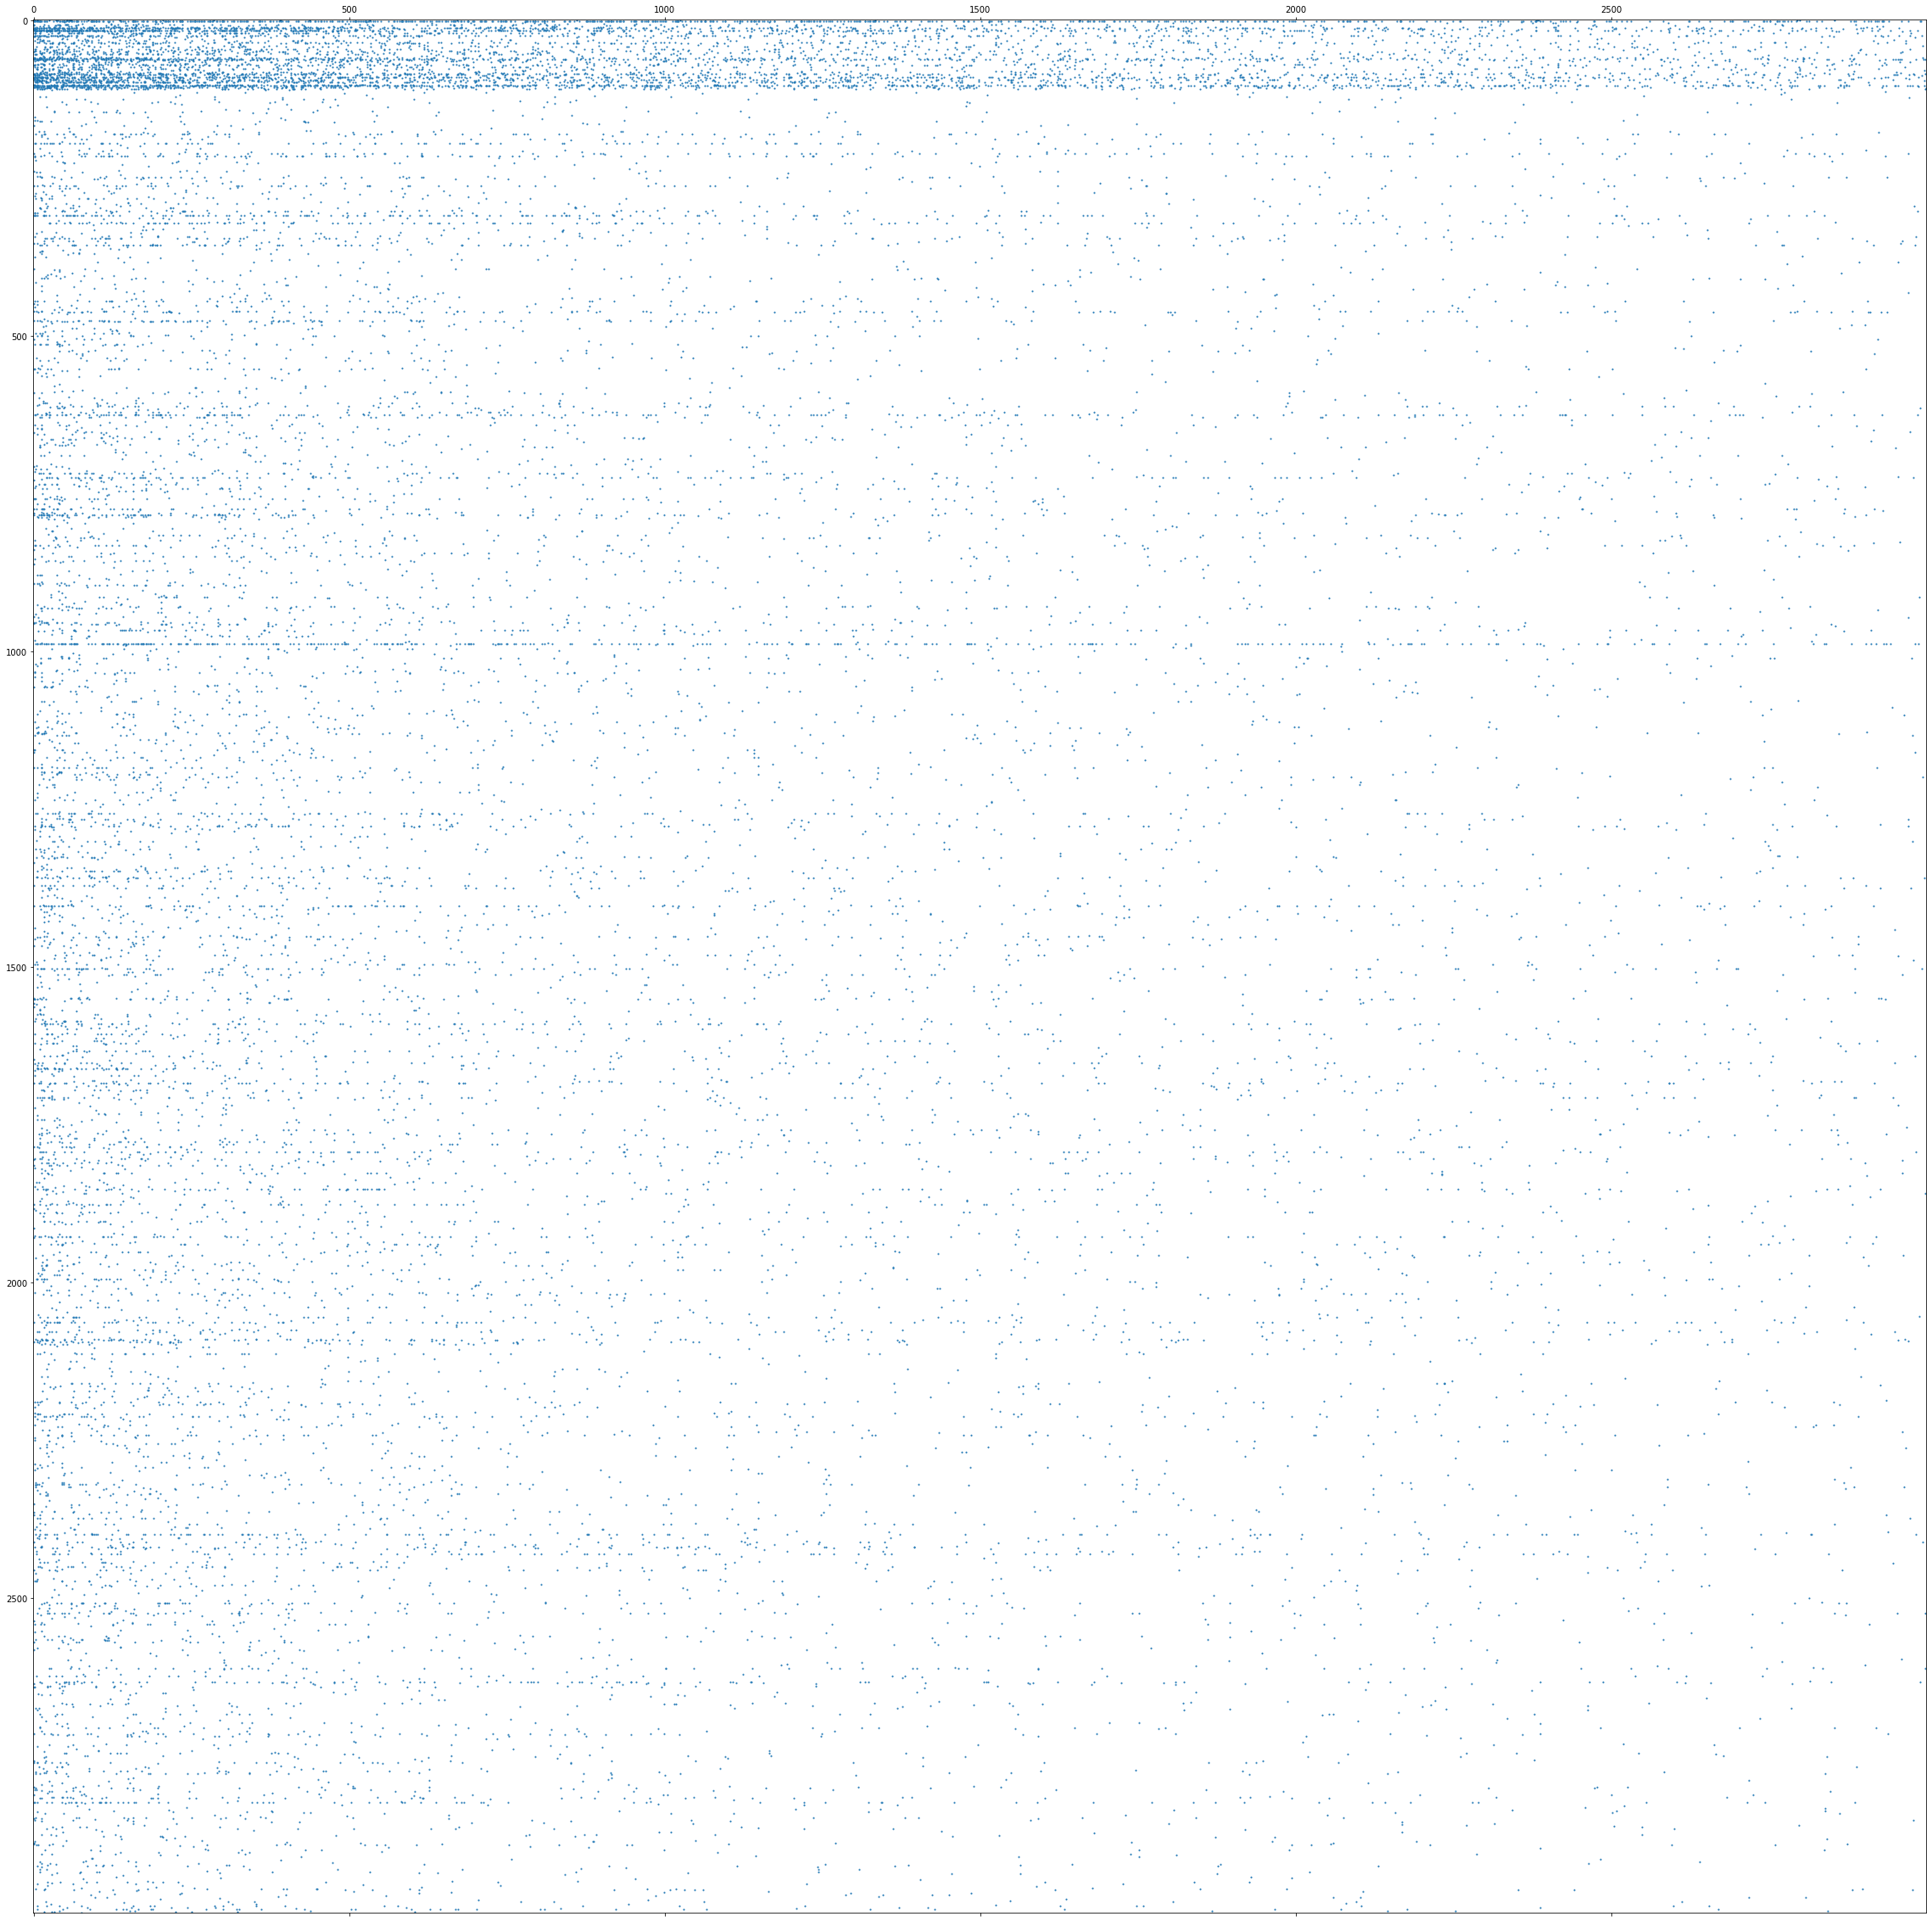

In [ ]:
plt.figure(figsize=(40, 60))
plt.spy(Matrix.iloc[:3000, :3000], markersize=1)

-------

##Filtering and normalization 

Maybe we need to add this part of filtering and normalization in order to have to handle a smaller matrix in the analysis

In [8]:
Matrix[Matrix.columns[(Matrix != 0).any()]]

,CCAGCCCACAATTA-1,ATCTTGAGTTTGGC-1,CCATTTTAGAAGTA-1,GCTCGCGTCTGTNG-1,TCAGGNGTTTGGGG-1,AAATCCCGTGGGGG-1,AAACTAACCCCANA-1,NTGCTACACGGTAA-1,AGTCCAAGCTCTTG-1,GCTTCTAGTGACGG-1,...,TTATTCCACTCCTT-1,TTCTTTTTTCCCTT-1,AAAGTNTTGTTCGC-1,NCGCTTTTAAAATN-1,CCGCATAGCGGCGT-1,ATGAGGCAATTAGG-1,AATCTTTGTTTTGA-1,ACATGTTTTCGGGT-1,ATCCCTTTTTNTAA-1,AGAAAAACAATCCC-1
1,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,1,0,1,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,4,3,3,0,8,0,2,4,2,1,...,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZYG11B,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
ZYX,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we proceed with the library size normalization/CPM (Count Per Million)

In [12]:
Matrix = Matrix / Matrix.sum(axis=0)

In [13]:
Matrix

,CCAGCCCACAATTA-1,ATCTTGAGTTTGGC-1,CCATTTTAGAAGTA-1,GCTCGCGTCTGTNG-1,TCAGGNGTTTGGGG-1,AAATCCCGTGGGGG-1,AAACTAACCCCANA-1,NTGCTACACGGTAA-1,AGTCCAAGCTCTTG-1,GCTTCTAGTGACGG-1,...,TTATTCCACTCCTT-1,TTCTTTTTTCCCTT-1,AAAGTNTTGTTCGC-1,NCGCTTTTAAAATN-1,CCGCATAGCGGCGT-1,ATGAGGCAATTAGG-1,AATCTTTGTTTTGA-1,ACATGTTTTCGGGT-1,ATCCCTTTTTNTAA-1,AGAAAAACAATCCC-1
1,,,,,,,,,,,,,,,,,,,,,
A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BG-AS1,0.000099,0.000000,0.000119,0.000000,0.000000,0.000141,0.000304,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M,0.000397,0.000351,0.000357,0.000000,0.001095,0.000000,0.000304,0.000662,0.000336,0.00017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2ML1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZYG11B,0.000000,0.000000,0.000000,0.000127,0.000000,0.000000,0.000000,0.000000,0.000000,0.00017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZYX,0.000099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

##Construction of the table itself

###Cleaning a little bit the dataframes

In [14]:
position = pd.read_table("/content/drive/MyDrive/Bocconi/Colab Notebooks/CSE201 Trascriptomic++/Data/Sayal_Puck_1_barcode_matching.txt", header = None)
position

,0,1,2,3
0,AAAAAAAAAAAAAG,AAAAAACAAAANAG-1,2421.0,2815.8
1,AAAAAAAACAAAAA,AAAAAAAGNAAAAA-1,4391.7,2219.7
2,AAAAAAAGAGTGCT,AAAAAAAGAGTACT-1,3579.2,834.8
3,AAAAAAATATAAAC,AAAAAAATATAAAA-1,2488.4,4809.3
4,AAAAAACCGGGGTT,AAAAAACCGGGGTT-1,3168.9,2675.8
...,...,...,...,...
24568,TTTTTTTTTTTTAT,TTTTCTTTTTTTAT-1,3168.3,4801.3
24569,TTTTTTTTTTTTCA,TTTTTTTTTTTTCC-1,3468.2,861.8
24570,TTTTTTTTTTTTCG,TTTTTTTTTTTTCC-1,3468.2,861.8
24571,TTTTTTTTTTTTGA,TTTTTTTTTTTTGC-1,5032.4,1890.3


In [15]:
cleaned_pos = position.drop_duplicates(subset=[1], keep=False)
cleaned_pos = cleaned_pos.drop(labels = [0], axis = 1)

In [16]:
Small_dist = cleaned_pos.iloc[:5000, :]

In [17]:
Small_dist

,1,2,3
0,AAAAAACAAAANAG-1,2421.0,2815.8
1,AAAAAAAGNAAAAA-1,4391.7,2219.7
2,AAAAAAAGAGTACT-1,3579.2,834.8
3,AAAAAAATATAAAA-1,2488.4,4809.3
4,AAAAAACCGGGGTT-1,3168.9,2675.8
...,...,...,...
9812,CCTTTAACGCGTCT-1,5621.5,2003.9
9822,CCTTNACTAGTGGT-1,2041.5,4290.9
9823,CCTTCAGAGCATAA-1,2821.8,4823.2
9824,CCTTTAGCGCTTGC-1,3362.4,2267.7


In [18]:
Small_matrix = Matrix[Matrix.columns.intersection(list(Small_dist[1]))]
Small_matrix

,AAAATCCTGAGCGT-1,ATTTTTGGTCATAA-1,ATGTTTTCAGGCCA-1,CACACGGAGTATAA-1,AGTATGGTTCTAAA-1,AAGGCATTAGTCCT-1,ATTCACCATGTATT-1,ATGAAATCCAAGAA-1,CCGTCTCTATGCTC-1,CCTATTTTCAATCA-1,...,TAGCTAAATTAGAC-1,CACTGTGGCACTAA-1,AACGCTACTTTCTT-1,AAAGTNTTGTTCGC-1,CCGCATAGCGGCGT-1,ATGAGGCAATTAGG-1,AATCTTTGTTTTGA-1,ACATGTTTTCGGGT-1,ATCCCTTTTTNTAA-1,AGAAAAACAATCCC-1
1,,,,,,,,,,,,,,,,,,,,,
A1BG,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BG-AS1,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M,0.000000,0.00075,0.0,0.0,0.000405,0.000000,0.000884,0.000453,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M-AS1,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2ML1,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZYG11B,0.000262,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZYX,0.000262,0.00000,0.0,0.0,0.000000,0.000427,0.000000,0.000453,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
gene_names = list(pd.read_csv("/content/drive/MyDrive/Bocconi/Colab Notebooks/CSE201 Trascriptomic++/Data/In Situ Sequencing-Table 1 - In Situ Sequencing-Table 1.csv", header = None)[0])

In [20]:
gene_names.remove("CEACAM8")


In [21]:
Small_matrix = Small_matrix.loc[gene_names]

In [38]:
#Correct the order of the beamns in the distance matrix
Small_dist = Small_dist.set_index(1)
Small_dist = Small_dist.loc[list(Small_matrix.columns)]

In [54]:
list(Small_dist.index)

5000

-----
#First method: Table as nighbors average


##STEP 1

In [48]:
from scipy.spatial import distance_matrix

dist_mat = pd.DataFrame(distance_matrix(Small_dist.values, Small_dist.values), index=Small_dist.index, columns=Small_dist.index)

In [55]:
#Rename the columns to memorize which gene you're considering 
cell_names = list(Small_dist.index)
dist_mat.columns = cell_names
dist_mat.index = cell_names


In [56]:
dist_mat

,AAAATCCTGAGCGT-1,ATTTTTGGTCATAA-1,ATGTTTTCAGGCCA-1,CACACGGAGTATAA-1,AGTATGGTTCTAAA-1,AAGGCATTAGTCCT-1,ATTCACCATGTATT-1,ATGAAATCCAAGAA-1,CCGTCTCTATGCTC-1,CCTATTTTCAATCA-1,...,TAGCTAAATTAGAC-1,CACTGTGGCACTAA-1,AACGCTACTTTCTT-1,AAAGTNTTGTTCGC-1,CCGCATAGCGGCGT-1,ATGAGGCAATTAGG-1,AATCTTTGTTTTGA-1,ACATGTTTTCGGGT-1,ATCCCTTTTTNTAA-1,AGAAAAACAATCCC-1
AAAATCCTGAGCGT-1,0.000000,82.947272,2325.274962,157.336073,2534.557999,2699.301067,468.574370,3002.423529,100.751824,3405.472552,...,4299.640456,4110.187524,1748.047740,1740.232686,3148.974959,4270.259272,1051.629108,3753.839257,231.406417,2079.211132
ATTTTTGGTCATAA-1,82.947272,0.000000,2335.399345,106.852281,2598.811748,2764.143267,551.493907,3067.819291,165.414993,3464.686654,...,4364.231261,4147.238292,1817.092472,1815.340500,3170.885709,4328.245402,1125.242183,3834.343344,243.515092,2076.772621
ATGTTTTCAGGCCA-1,2325.274962,2335.399345,0.000000,2439.493031,1838.054025,1948.694666,2336.591109,2155.037007,2240.642787,2169.769926,...,3115.291961,2083.412895,3511.337217,3340.905100,918.067405,2825.596411,1935.256430,3674.456382,2096.174692,418.355471
CACACGGAGTATAA-1,157.336073,106.852281,2439.493031,0.000000,2691.886366,2856.636885,596.544533,3159.745567,256.606800,3562.064348,...,4456.976510,4253.578658,1798.727445,1812.542049,3277.292439,4426.524322,1206.553811,3896.843986,350.255692,2176.276786
AGTATGGTTCTAAA-1,2534.557999,2598.811748,1838.054025,2691.886366,0.000000,167.733419,2205.112498,472.488836,2436.100002,909.569134,...,1765.436207,2075.767629,2658.883046,2407.160429,1832.944702,1772.105008,1517.675384,1836.466112,2398.589356,2098.950123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATGAGGCAATTAGG-1,4270.259272,4328.245402,2825.596411,4426.524322,1772.105008,1623.488127,3969.743257,1353.672553,4170.031830,867.928713,...,512.072221,1316.286401,4337.341869,4074.769251,2170.946494,0.000000,3283.124184,2263.592918,4111.804609,3224.690165
AATCTTTGTTTTGA-1,1051.629108,1125.242183,1935.256430,1206.553811,1517.675384,1677.139031,687.481345,1975.137983,959.964192,2415.452993,...,3272.292922,3311.089950,1576.355556,1410.945506,2549.548597,3283.124184,0.000000,2747.564931,969.624881,1880.626824
ACATGTTTTCGGGT-1,3753.839257,3834.343344,3674.456382,3896.843986,1836.466112,1736.630968,3305.179506,1603.335149,3674.672040,1933.174087,...,1830.007699,3332.516102,2906.842171,2660.564641,3558.157335,2263.592918,2747.564931,0.000000,3711.011442,3919.826654
ATCCCTTTTTNTAA-1,231.406417,243.515092,2096.174692,350.255692,2398.589356,2565.208779,534.387771,2869.923386,167.057954,3251.291111,...,4162.760250,3906.784515,1893.605294,1858.018894,2927.561364,4111.804609,969.624881,3711.011442,0.000000,1847.856369



##STEP 2

In [57]:
def linkage_score(d, M=5000, p=2):
  return ((max(0, M-d)/M)**p)

In [58]:
linkage_mat = dist_mat.applymap(linkage_score)


##STEP 3 

In [59]:
linkage_mat

,AAAATCCTGAGCGT-1,ATTTTTGGTCATAA-1,ATGTTTTCAGGCCA-1,CACACGGAGTATAA-1,AGTATGGTTCTAAA-1,AAGGCATTAGTCCT-1,ATTCACCATGTATT-1,ATGAAATCCAAGAA-1,CCGTCTCTATGCTC-1,CCTATTTTCAATCA-1,...,TAGCTAAATTAGAC-1,CACTGTGGCACTAA-1,AACGCTACTTTCTT-1,AAAGTNTTGTTCGC-1,CCGCATAGCGGCGT-1,ATGAGGCAATTAGG-1,AATCTTTGTTTTGA-1,ACATGTTTTCGGGT-1,ATCCCTTTTTNTAA-1,AGAAAAACAATCCC-1
AAAATCCTGAGCGT-1,1.000000,0.967096,0.286166,0.938056,0.243136,0.211729,0.821353,0.159612,0.960105,0.101701,...,0.019620,0.031671,0.423008,0.425043,0.137052,0.021301,0.623585,0.062117,0.909579,0.341240
ATTTTTGGTCATAA-1,0.967096,1.000000,0.284004,0.957716,0.230628,0.199962,0.791568,0.149333,0.934928,0.094287,...,0.016168,0.029088,0.405236,0.405682,0.133826,0.018050,0.600550,0.054350,0.904966,0.341810
ATGTTTTCAGGCCA-1,0.286166,0.284004,1.000000,0.262248,0.399916,0.372419,0.283750,0.323753,0.304562,0.320408,...,0.142085,0.340259,0.088645,0.110104,0.666487,0.189121,0.375706,0.070283,0.337288,0.839659
CACACGGAGTATAA-1,0.938056,0.957716,0.262248,1.000000,0.213096,0.183760,0.775617,0.135461,0.899991,0.082706,...,0.011795,0.022286,0.409926,0.406396,0.118709,0.013155,0.575609,0.048678,0.864805,0.318937
AGTATGGTTCTAAA-1,0.243136,0.230628,0.399916,0.213096,1.000000,0.934032,0.312456,0.819934,0.262943,0.669265,...,0.418496,0.342045,0.219233,0.268913,0.401210,0.416772,0.485063,0.400318,0.270693,0.336644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATGAGGCAATTAGG-1,0.021301,0.018050,0.189121,0.013155,0.416772,0.456033,0.042457,0.531828,0.027554,0.682961,...,0.805660,0.542790,0.017565,0.034242,0.320142,1.000000,0.117907,0.299517,0.031556,0.126069
AATCTTTGTTTTGA-1,0.623585,0.600550,0.375706,0.575609,0.485063,0.441656,0.743913,0.365992,0.652876,0.267195,...,0.119399,0.114097,0.468854,0.515252,0.240188,0.117907,1.000000,0.202939,0.649757,0.389220
ACATGTTTTCGGGT-1,0.062117,0.054350,0.070283,0.048678,0.400318,0.425983,0.114897,0.461493,0.070260,0.376217,...,0.401954,0.111220,0.175252,0.218918,0.083156,0.299517,0.202939,1.000000,0.066460,0.046671
ATCCCTTTTTNTAA-1,0.909579,0.904966,0.337288,0.864805,0.270693,0.237128,0.797668,0.181489,0.934293,0.122319,...,0.028039,0.047805,0.385988,0.394882,0.171800,0.031556,0.649757,0.066460,1.000000,0.397440


In [74]:
Small_matrix

,AAAATCCTGAGCGT-1,ATTTTTGGTCATAA-1,ATGTTTTCAGGCCA-1,CACACGGAGTATAA-1,AGTATGGTTCTAAA-1,AAGGCATTAGTCCT-1,ATTCACCATGTATT-1,ATGAAATCCAAGAA-1,CCGTCTCTATGCTC-1,CCTATTTTCAATCA-1,...,TAGCTAAATTAGAC-1,CACTGTGGCACTAA-1,AACGCTACTTTCTT-1,AAAGTNTTGTTCGC-1,CCGCATAGCGGCGT-1,ATGAGGCAATTAGG-1,AATCTTTGTTTTGA-1,ACATGTTTTCGGGT-1,ATCCCTTTTTNTAA-1,AGAAAAACAATCCC-1
1,,,,,,,,,,,,,,,,,,,,,
ACTB,0.007341,0.001875,0.002259,0.004203,0.003241,0.004268,0.000884,0.002264,0.00322,0.000959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADAM17,0.000000,0.000750,0.000000,0.000000,0.000405,0.000000,0.000000,0.000000,0.00046,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
APOE,0.000000,0.000000,0.000753,0.000382,0.000000,0.000000,0.001326,0.000000,0.00046,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AREG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BNIP3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPSAB1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TUBA1A,0.000000,0.000000,0.001130,0.000000,0.000000,0.000854,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TYROBP,0.000262,0.000000,0.000000,0.000382,0.000405,0.000000,0.000884,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


It's clear from the firt line that if we want to make comparisons between genes we need to nomralize row wise, the first row is too important and will baias the result. Notice that there are some rows that are all zeroes that would cause some zero division error and nan returned, but we keep them as rows of zeroes 

In [86]:
Small_matrix = Small_matrix.divide(Small_matrix.sum(axis =1), axis =0).fillna(0)

In [87]:
Small_matrix

,AAAATCCTGAGCGT-1,ATTTTTGGTCATAA-1,ATGTTTTCAGGCCA-1,CACACGGAGTATAA-1,AGTATGGTTCTAAA-1,AAGGCATTAGTCCT-1,ATTCACCATGTATT-1,ATGAAATCCAAGAA-1,CCGTCTCTATGCTC-1,CCTATTTTCAATCA-1,...,TAGCTAAATTAGAC-1,CACTGTGGCACTAA-1,AACGCTACTTTCTT-1,AAAGTNTTGTTCGC-1,CCGCATAGCGGCGT-1,ATGAGGCAATTAGG-1,AATCTTTGTTTTGA-1,ACATGTTTTCGGGT-1,ATCCCTTTTTNTAA-1,AGAAAAACAATCCC-1
1,,,,,,,,,,,,,,,,,,,,,
ACTB,0.000547,0.000140,0.000168,0.000313,0.000242,0.000318,0.000066,0.000169,0.000240,0.000072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADAM17,0.000000,0.001585,0.000000,0.000000,0.000857,0.000000,0.000000,0.000000,0.000972,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
APOE,0.000000,0.000000,0.000607,0.000308,0.000000,0.000000,0.001069,0.000000,0.000371,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AREG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BNIP3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPSAB1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TUBA1A,0.000000,0.000000,0.000869,0.000000,0.000000,0.000657,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TYROBP,0.000217,0.000000,0.000000,0.000316,0.000335,0.000000,0.000732,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


----

In [91]:
cell = 0
(Small_matrix.dot(linkage_mat.iloc[cell, :]) - Small_matrix.iloc[:, cell]) /(Small_matrix.shape[1] - 1)

1
ACTB      0.000061
ADAM17    0.000096
APOE      0.000069
AREG      0.000028
BNIP3     0.000075
            ...   
TPSAB1    0.000000
TUBA1A    0.000052
TYROBP    0.000048
VEGFA     0.000064
YKT6      0.000062
Length: 97, dtype: float64

In [92]:
#Initialize dataframe with a column of zeroes
Neighbors = pd.DataFrame(np.zeros((Small_matrix.shape[0],1)))

#Fill the dataframe with the product we want 
for cell in range(Small_matrix.shape[1]):
  Neighbors[cell_names[cell]] = np.array((Small_matrix.dot(linkage_mat.iloc[cell, :]) - Small_matrix.iloc[:, cell]) /(Small_matrix.shape[1] - 1))

#Deleate the first column
Neighbors = Neighbors.drop(labels = 0, axis=1)


<ipython-input-92-4853b8e5936b>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  Neighbors[cell_names[cell]] = np.array((Small_matrix.dot(linkage_mat.iloc[cell, :]) - Small_matrix.iloc[:, cell]) /(Small_matrix.shape[1] - 1))
<ipython-input-92-4853b8e5936b>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  Neighbors[cell_names[cell]] = np.array((Small_matrix.dot(linkage_mat.iloc[cell, :]) - Small_matrix.iloc[:, cell]) /(Small_matrix.shape[1] - 1))
<ipython-input-92-4853b8e5936b>:6: PerformanceWarning: DataFrame is highly fragmen

In [93]:
Neighbors

,AAAATCCTGAGCGT-1,ATTTTTGGTCATAA-1,ATGTTTTCAGGCCA-1,CACACGGAGTATAA-1,AGTATGGTTCTAAA-1,AAGGCATTAGTCCT-1,ATTCACCATGTATT-1,ATGAAATCCAAGAA-1,CCGTCTCTATGCTC-1,CCTATTTTCAATCA-1,...,TAGCTAAATTAGAC-1,CACTGTGGCACTAA-1,AACGCTACTTTCTT-1,AAAGTNTTGTTCGC-1,CCGCATAGCGGCGT-1,ATGAGGCAATTAGG-1,AATCTTTGTTTTGA-1,ACATGTTTTCGGGT-1,ATCCCTTTTTNTAA-1,AGAAAAACAATCCC-1
0,0.000061,0.000060,0.000092,0.000057,0.000094,0.000092,0.000065,0.000088,0.000064,0.000088,...,0.000059,0.000073,0.000036,0.000041,0.000090,0.000066,0.000080,0.000040,0.000067,0.000086
1,0.000096,0.000094,0.000091,0.000090,0.000071,0.000068,0.000097,0.000061,0.000100,0.000060,...,0.000037,0.000050,0.000048,0.000052,0.000069,0.000046,0.000099,0.000024,0.000103,0.000095
2,0.000069,0.000068,0.000107,0.000064,0.000088,0.000085,0.000073,0.000078,0.000072,0.000074,...,0.000046,0.000061,0.000042,0.000048,0.000089,0.000051,0.000089,0.000034,0.000075,0.000104
3,0.000028,0.000027,0.000087,0.000024,0.000103,0.000107,0.000032,0.000114,0.000031,0.000139,...,0.000105,0.000106,0.000013,0.000018,0.000096,0.000123,0.000052,0.000048,0.000034,0.000077
4,0.000075,0.000074,0.000117,0.000070,0.000091,0.000087,0.000077,0.000078,0.000078,0.000076,...,0.000041,0.000067,0.000038,0.000044,0.000109,0.000048,0.000092,0.000028,0.000083,0.000111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
93,0.000052,0.000051,0.000109,0.000048,0.000095,0.000092,0.000054,0.000088,0.000055,0.000090,...,0.000055,0.000081,0.000024,0.000028,0.000107,0.000063,0.000070,0.000034,0.000059,0.000102
94,0.000048,0.000047,0.000097,0.000044,0.000085,0.000085,0.000051,0.000082,0.000050,0.000084,...,0.000058,0.000081,0.000026,0.000031,0.000102,0.000065,0.000065,0.000038,0.000053,0.000089
95,0.000064,0.000064,0.000138,0.000060,0.000086,0.000082,0.000064,0.000075,0.000068,0.000075,...,0.000045,0.000070,0.000026,0.000030,0.000105,0.000055,0.000081,0.000024,0.000073,0.000128


----
(Here we upload the table to not calculate it every time)

In [ ]:
Neighbors = pd.read_csv("/content/drive/MyDrive/Bocconi/Colab Notebooks/CSE201 Trascriptomic++/Data/Small_neighbors.csv", index_col= 0)

In [95]:
Neighbors

,AAAATCCTGAGCGT-1,ATTTTTGGTCATAA-1,ATGTTTTCAGGCCA-1,CACACGGAGTATAA-1,AGTATGGTTCTAAA-1,AAGGCATTAGTCCT-1,ATTCACCATGTATT-1,ATGAAATCCAAGAA-1,CCGTCTCTATGCTC-1,CCTATTTTCAATCA-1,...,TAGCTAAATTAGAC-1,CACTGTGGCACTAA-1,AACGCTACTTTCTT-1,AAAGTNTTGTTCGC-1,CCGCATAGCGGCGT-1,ATGAGGCAATTAGG-1,AATCTTTGTTTTGA-1,ACATGTTTTCGGGT-1,ATCCCTTTTTNTAA-1,AGAAAAACAATCCC-1
0,0.000061,0.000060,0.000092,0.000057,0.000094,0.000092,0.000065,0.000088,0.000064,0.000088,...,0.000059,0.000073,0.000036,0.000041,0.000090,0.000066,0.000080,0.000040,0.000067,0.000086
1,0.000096,0.000094,0.000091,0.000090,0.000071,0.000068,0.000097,0.000061,0.000100,0.000060,...,0.000037,0.000050,0.000048,0.000052,0.000069,0.000046,0.000099,0.000024,0.000103,0.000095
2,0.000069,0.000068,0.000107,0.000064,0.000088,0.000085,0.000073,0.000078,0.000072,0.000074,...,0.000046,0.000061,0.000042,0.000048,0.000089,0.000051,0.000089,0.000034,0.000075,0.000104
3,0.000028,0.000027,0.000087,0.000024,0.000103,0.000107,0.000032,0.000114,0.000031,0.000139,...,0.000105,0.000106,0.000013,0.000018,0.000096,0.000123,0.000052,0.000048,0.000034,0.000077
4,0.000075,0.000074,0.000117,0.000070,0.000091,0.000087,0.000077,0.000078,0.000078,0.000076,...,0.000041,0.000067,0.000038,0.000044,0.000109,0.000048,0.000092,0.000028,0.000083,0.000111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
93,0.000052,0.000051,0.000109,0.000048,0.000095,0.000092,0.000054,0.000088,0.000055,0.000090,...,0.000055,0.000081,0.000024,0.000028,0.000107,0.000063,0.000070,0.000034,0.000059,0.000102
94,0.000048,0.000047,0.000097,0.000044,0.000085,0.000085,0.000051,0.000082,0.000050,0.000084,...,0.000058,0.000081,0.000026,0.000031,0.000102,0.000065,0.000065,0.000038,0.000053,0.000089
95,0.000064,0.000064,0.000138,0.000060,0.000086,0.000082,0.000064,0.000075,0.000068,0.000075,...,0.000045,0.000070,0.000026,0.000030,0.000105,0.000055,0.000081,0.000024,0.000073,0.000128


In [ ]:
#TEST CELL
n_genes = Small_matrix.shape[0]
np.outer(Small_matrix.iloc[:,0], Neighbors.iloc[:,0])
abs(5 - Neighbors.iloc[:,0])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

------

##STEP 4

In [ ]:
def important_function(x_i, Y):
  pre_vector = abs(x_i - Y)
  pre_mean = np.mean(pre_vector)
  flipped_vec = pre_mean - pre_vector
  return flipped_vec

In [96]:
def important_function_2(x_i, Y, a = 2, b = 0.5):
  return - a * abs(x_i - Y) + b *( x_i + Y)

In [98]:
#Build the matrix for the first beam 
n_beams = Small_matrix.shape[1]
n_genes = Small_matrix.shape[0]

Final_tensor = np.zeros((n_beams, n_genes, n_genes))

for beam in range(n_beams):
  for x_i in enumerate(Small_matrix.iloc[:,beam]):
    Final_tensor[beam][x_i[0]] = important_function_2(x_i[1], Neighbors.iloc[:,beam], a=1)


In [117]:
mat_new = pd.DataFrame(np.mean(Final_tensor, axis=0))
mat_new

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,-0.000340,-0.000338,-0.000340,-0.000342,-0.000342,-0.000338,-0.000341,-0.0003,-0.000341,-0.000341,...,-0.000345,-0.000342,-0.000337,-0.000344,-0.000341,-0.0003,-0.000340,-0.000338,-0.000342,-0.000336
1,-0.000417,-0.000412,-0.000419,-0.000419,-0.000427,-0.000412,-0.000418,-0.0003,-0.000423,-0.000421,...,-0.000435,-0.000421,-0.000415,-0.000433,-0.000419,-0.0003,-0.000422,-0.000412,-0.000428,-0.000408
2,-0.000407,-0.000402,-0.000409,-0.000410,-0.000417,-0.000403,-0.000409,-0.0003,-0.000412,-0.000412,...,-0.000425,-0.000412,-0.000404,-0.000422,-0.000410,-0.0003,-0.000412,-0.000403,-0.000417,-0.000399
3,-0.000418,-0.000414,-0.000421,-0.000421,-0.000430,-0.000414,-0.000420,-0.0003,-0.000425,-0.000423,...,-0.000437,-0.000423,-0.000417,-0.000435,-0.000421,-0.0003,-0.000424,-0.000414,-0.000430,-0.000410
4,-0.000418,-0.000413,-0.000420,-0.000420,-0.000429,-0.000414,-0.000420,-0.0003,-0.000424,-0.000423,...,-0.000436,-0.000423,-0.000416,-0.000434,-0.000421,-0.0003,-0.000423,-0.000414,-0.000430,-0.000410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,-0.000119,-0.000114,-0.000122,-0.000121,-0.000130,-0.000115,-0.000121,0.0000,-0.000126,-0.000124,...,-0.000138,-0.000124,-0.000118,-0.000136,-0.000122,0.0000,-0.000124,-0.000115,-0.000131,-0.000111
93,-0.000407,-0.000402,-0.000409,-0.000409,-0.000416,-0.000403,-0.000408,-0.0003,-0.000412,-0.000411,...,-0.000424,-0.000412,-0.000404,-0.000421,-0.000409,-0.0003,-0.000411,-0.000403,-0.000416,-0.000399
94,-0.000407,-0.000403,-0.000409,-0.000410,-0.000417,-0.000403,-0.000409,-0.0003,-0.000413,-0.000412,...,-0.000424,-0.000412,-0.000405,-0.000422,-0.000410,-0.0003,-0.000412,-0.000403,-0.000417,-0.000399
95,-0.000417,-0.000412,-0.000419,-0.000419,-0.000428,-0.000413,-0.000418,-0.0003,-0.000423,-0.000422,...,-0.000435,-0.000422,-0.000415,-0.000433,-0.000419,-0.0003,-0.000422,-0.000412,-0.000428,-0.000408


In [107]:
df

,0,1,2
0,3,5,2
1,4,2,5
2,1,1,0


In [121]:
#TESTING CELL
row = 7
col = 92

np.log2(mat_new.iloc[row, column] / np.mean(mat_new.iloc[row, :]))

-0.026176322839181292

-----

##STEPS 5, 6

In [118]:

final_table = pd.DataFrame(np.zeros((n_genes, n_genes)))

for row in range(mat_new.shape[0]):
  for column in range(mat_new.shape[1]):
    final_table.iloc[row, column] = np.log2(mat_new.iloc[row, column] / np.mean(mat_new.iloc[row, :]))


<ipython-input-118-07350499765f>:5: RuntimeWarning: divide by zero encountered in log2
  final_table.iloc[row, column] = np.log2(mat_new.iloc[row, column] / np.mean(mat_new.iloc[row, :]))
<ipython-input-118-07350499765f>:5: RuntimeWarning: divide by zero encountered in log2
  final_table.iloc[row, column] = np.log2(mat_new.iloc[row, column] / np.mean(mat_new.iloc[row, :]))
<ipython-input-118-07350499765f>:5: RuntimeWarning: divide by zero encountered in log2
  final_table.iloc[row, column] = np.log2(mat_new.iloc[row, column] / np.mean(mat_new.iloc[row, :]))
<ipython-input-118-07350499765f>:5: RuntimeWarning: divide by zero encountered in log2
  final_table.iloc[row, column] = np.log2(mat_new.iloc[row, column] / np.mean(mat_new.iloc[row, :]))
<ipython-input-118-07350499765f>:5: RuntimeWarning: divide by zero encountered in log2
  final_table.iloc[row, column] = np.log2(mat_new.iloc[row, column] / np.mean(mat_new.iloc[row, :]))
<ipython-input-118-07350499765f>:5: RuntimeWarning: divide b

In [126]:
final_table.columns = gene_names
final_table.index = gene_names

final_table


,ACTB,ADAM17,APOE,AREG,BNIP3,C1QA,C1QB,CA9,CCR4,CD14,...,SLC25A32,SLC2A1,TGFA,TGFBR1,TPI1,TPSAB1,TUBA1A,TYROBP,VEGFA,YKT6
ACTB,0.010856,0.001863,0.011162,0.016967,0.020313,0.004011,0.013232,-0.170060,0.014406,0.015614,...,0.031309,0.018778,-0.002774,0.025601,0.012906,-0.170060,0.011978,0.003013,0.018143,-0.007553
ADAM17,0.021789,0.005004,0.030364,0.030673,0.059217,0.007524,0.027645,-0.451742,0.043269,0.038454,...,0.084295,0.038740,0.015483,0.076741,0.030956,-0.451742,0.039362,0.006671,0.061386,-0.007539
APOE,0.021416,0.003425,0.028292,0.032203,0.054679,0.007082,0.026514,-0.420042,0.038970,0.036073,...,0.081863,0.038692,0.009975,0.071093,0.029418,-0.420042,0.036879,0.006843,0.055381,-0.008285
AREG,0.021804,0.005213,0.030767,0.030516,0.059928,0.007611,0.027773,-0.457914,0.044417,0.038743,...,0.084241,0.038484,0.017179,0.077723,0.030986,-0.457914,0.039656,0.006467,0.062308,-0.007187
BNIP3,0.021827,0.004806,0.030603,0.030748,0.060110,0.007559,0.027724,-0.456287,0.043998,0.038626,...,0.084731,0.038761,0.016578,0.077385,0.031043,-0.456287,0.039817,0.006722,0.062218,-0.007014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPSAB1,0.078579,0.018554,0.110166,0.108316,0.209325,0.027715,0.099526,-inf,0.156828,0.137722,...,0.289025,0.137045,0.062262,0.267575,0.111044,-inf,0.141285,0.023895,0.217824,-0.026176
TUBA1A,0.021128,0.004602,0.027795,0.030582,0.054222,0.007194,0.026302,-0.418232,0.039509,0.035744,...,0.079226,0.037755,0.011727,0.070601,0.028832,-0.418232,0.036485,0.006342,0.054737,-0.007821
TYROBP,0.020700,0.004763,0.028399,0.029026,0.055242,0.007182,0.026080,-0.420182,0.040671,0.036161,...,0.078366,0.036749,0.013700,0.071648,0.028973,-0.420182,0.036341,0.006574,0.056558,-0.007452
VEGFA,0.021802,0.004654,0.030325,0.030769,0.059146,0.007543,0.027581,-0.452269,0.043083,0.038318,...,0.084629,0.038682,0.015653,0.076600,0.030897,-0.452269,0.039462,0.006788,0.061752,-0.007277


----
---


#Second method: wasserstein distance 

In [ ]:

def sliced_wasserstein(Coord_1, values_1, Coord_2, values_2, num_proj=10):
    '''
    This function performs an approximation of the 2D Wasserstein distance (Earth Moving Distnace) using the 1D version. 
    It does it by applying first a projection on a random direction of the 2D space and then calculating the EMD on that plane.
    You repeat the process a number of times given by `num_proj` and you take the average of the results.
    
    - `Coord_1` : These are the points of the first distribution that should be given as Pandas Dataframe of Numpy matrix 
    - `values_1` : This is the vectorof values relative to the points of the Coord_1 variable
    - `Coord_2` : These are the points of the second distribution that should be given as Pandas Dataframe of Numpy matrix 
    - `values_2` : This is the vectorof values relative to the points of the Coord_2 variable
    - `num_proj` : This is the number of iteration you want this process to be repeated
    '''
    
    #Dimension of the domain 
    dim = 2
    #List where we will store the valies of the wassertain distance 
    ests = []
    
    for _ in range(num_proj):
        # sample uniformly from the unit sphere
        
        dir = np.random.rand(dim)
        dir /= np.linalg.norm(dir)
        print("The choosen directions is:", dir)


        Coord_1 = np.array(Coord_1)
        Coord_2 = np.array(Coord_2)
   
        # project the data
        order1 = Coord_1 @ dir
        order2 = Coord_2 @ dir

        #Retrive the point ]
        slice_1 = [corr for _, corr in sorted(zip(order1, values_1))]
        slice_2 = [corr for _, corr in sorted(zip(order2, values_2))]
        print("The first slice is:", slice_1[:10],'\nThe second slice is:', slice_2[:10], '\n\n')

        # compute 1d wasserstein
        ests.append(stats.wasserstein_distance(slice_1, slice_2))
    
    print("\nThe resulting distance of the ditributions are", ests)
    
    print("The mean and final result is:")
    return np.mean(ests)


In [ ]:
Small_dist.head(10)

,1,2,3
0,AAAAAACAAAANAG-1,2421.0,2815.8
1,AAAAAAAGNAAAAA-1,4391.7,2219.7
2,AAAAAAAGAGTACT-1,3579.2,834.8
3,AAAAAAATATAAAA-1,2488.4,4809.3
4,AAAAAACCGGGGTT-1,3168.9,2675.8
6,AAAAACAGAGTAGG-1,4469.1,3523.1
8,AAAAACCCAAGGCT-1,4118.6,2353.8
12,AAAAACTTCGTTCA-1,3329.9,2401.1
15,AAAAAGCTAAACCT-1,3004.3,2226.4
18,AAAAAGGGGATGCG-1,3776.3,2933.2


In [ ]:
Small_matrix

,AAAATCCTGAGCGT-1,ATTTTTGGTCATAA-1,ATGTTTTCAGGCCA-1,CACACGGAGTATAA-1,AGTATGGTTCTAAA-1,AAGGCATTAGTCCT-1,ATTCACCATGTATT-1,ATGAAATCCAAGAA-1,CCGTCTCTATGCTC-1,CCTATTTTCAATCA-1,...,TAGCTAAATTAGAC-1,CACTGTGGCACTAA-1,AACGCTACTTTCTT-1,AAAGTNTTGTTCGC-1,CCGCATAGCGGCGT-1,ATGAGGCAATTAGG-1,AATCTTTGTTTTGA-1,ACATGTTTTCGGGT-1,ATCCCTTTTTNTAA-1,AGAAAAACAATCCC-1
1,,,,,,,,,,,,,,,,,,,,,
ACTB,28,5,6,11,8,10,2,5,7,2,...,0,0,0,0,0,0,0,0,0,0
ADAM17,0,2,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
APOE,0,0,2,1,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
AREG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BNIP3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPSAB1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TUBA1A,0,0,3,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TYROBP,1,0,0,1,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
np.array(Small_dist)

array([[2334.1, 5070.2],
       [2366.4, 5146.6],
       [4369.5, 3945.9],
       ...,
       [1758.2, 1360.8],
       [2549.8, 4986.4],
       [4286.8, 4356. ]])

In [ ]:
#Correct the order of the beamns in the distance matrix
Small_dist = Small_dist.loc[list(Small_matrix.columns)]

In [ ]:
gene_first_number = 4
gene_second_number = 2



sliced_wasserstein(Small_dist, Small_matrix.loc["ACTB"], Small_dist, Small_matrix.loc["GPI"] )

The choosen directions is: [0.80115401 0.59845823]
The first slice is: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 
The second slice is: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 


The choosen directions is: [0.66373024 0.74797204]
The first slice is: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
The second slice is: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 


The choosen directions is: [0.41575433 0.90947696]
The first slice is: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0] 
The second slice is: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 


The choosen directions is: [0.34197076 0.93971059]
The first slice is: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 
The second slice is: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 


The choosen directions is: [0.96792122 0.25125388]
The first slice is: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
The second slice is: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 


The choosen directions is: [0.60159685 0.79879987]
The first slice is: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 
The second slice is: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 


The choosen directions is: [0.82046429 0.57169778]
T

0.35899999999999965

In [ ]:
!pip install -U https://github.com/PythonOT/POT/archive/master.zip # with --user for user install (no root)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 2.7 MB 2.0 MB/s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for POT: filename=POT-0.8.3.dev0-cp38-cp38-linux_x86_64.whl size=504126 sha256=9ef6336ab64d62fb8e828e29663108263dbcff128a50e323981c60cb88dd534f
  Stored in directory: /tmp/pip-ephem-wheel-cache-ryqztenr/wheels/e5/7b/da/1e8317ef533d6d0c225ac2f90fc29d0f2c87c444a8dd510d15
Successfully built POT


In [ ]:
import ot

In [ ]:
ot.sliced_wasserstein_distance(np.array(Small_matrix), np.array(Small_matrix), np.array(Small_matrix.loc["ACTB"]), np.array(Small_matrix.loc["GPI"]))

47.233066461363144

In [ ]:
empty_df = pd.DataFrame(np.zeros((len(gene_names),len(gene_names))))

In [ ]:
empty_df.columns = gene_names
empty_df.index = gene_names

In [ ]:
empty_df

,ACTB,ADAM17,APOE,AREG,BNIP3,C1QA,C1QB,CA9,CCR4,CD14,...,SLC25A32,SLC2A1,TGFA,TGFBR1,TPI1,TPSAB1,TUBA1A,TYROBP,VEGFA,YKT6
ACTB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADAM17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
APOE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AREG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BNIP3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPSAB1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TUBA1A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TYROBP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VEGFA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for first_gene in gene_names:
  for second_gene in gene_names:
    dist = ot.sliced_wasserstein_distance(np.array(Small_matrix), np.array(Small_matrix), np.array(Small_matrix.loc[first_gene]), np.array(Small_matrix.loc[second_gene]))
    empty_df[first_gene][second_gene] = dist
    empty_df[second_gene][first_gene] = dist

In [ ]:
empty_df

,ACTB,ADAM17,APOE,AREG,BNIP3,C1QA,C1QB,CA9,CCR4,CD14,...,SLC25A32,SLC2A1,TGFA,TGFBR1,TPI1,TPSAB1,TUBA1A,TYROBP,VEGFA,YKT6
ACTB,0.000000,70.499210,61.286412,100.411531,72.462177,79.301237,84.002033,79.478638,99.058259,96.949258,...,79.344845,65.669577,87.552641,68.391348,65.577553,97.387519,98.060785,68.800353,70.523312,66.310140
ADAM17,70.499210,0.000000,17.049354,9.133769,10.725073,34.199217,26.286694,13.931643,12.655732,12.512698,...,13.212981,0.462206,17.167378,5.683121,19.172901,13.492658,21.840015,28.265180,3.114350,8.374063
APOE,61.286412,17.049354,0.000000,20.613343,22.013836,15.326759,16.361672,20.331125,22.372007,10.772114,...,25.753464,21.178687,16.985532,20.232974,15.501859,19.978628,15.739140,7.985262,16.780467,18.296332
AREG,100.411531,9.133769,20.613343,0.000000,4.430548,30.479060,26.161089,6.007940,0.456204,16.030306,...,7.048008,7.170752,5.706772,6.951067,27.220720,4.709735,31.932247,21.510213,10.841731,8.962562
BNIP3,72.462177,10.725073,22.013836,4.430548,0.000000,25.617148,20.013773,4.389477,4.552893,19.332023,...,3.844796,10.213022,3.678886,9.612518,20.883554,3.246704,26.240824,27.200660,10.780034,8.972874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPSAB1,97.387519,13.492658,19.978628,4.709735,3.246704,27.563378,25.390785,0.000000,6.827757,15.842988,...,0.000000,12.431931,0.000000,13.207057,20.844771,0.000000,24.830972,21.778402,13.637334,12.923100
TUBA1A,98.060785,21.840015,15.739140,31.932247,26.240824,8.752207,10.122529,35.756393,22.967858,18.567157,...,33.399668,24.880628,26.433601,31.016847,5.852741,24.830972,0.000000,10.876391,25.955411,27.737109
TYROBP,68.800353,28.265180,7.985262,21.510213,27.200660,13.781724,10.288313,21.910808,24.919755,18.561646,...,28.078759,24.853060,27.743780,25.936160,10.884118,21.778402,10.876391,0.000000,22.170056,30.855772
VEGFA,70.523312,3.114350,16.780467,10.841731,10.780034,29.594210,33.263138,13.337566,8.649991,15.452379,...,12.460240,4.016979,14.705095,4.808490,20.872516,13.637334,25.955411,22.170056,0.000000,2.800813


In [ ]:
coloc_table = (-2*(empty_df / max(empty_df.max())))+1

In [ ]:
coloc_table.to_csv("Colocaliz_table_puck_one.csv")